---
<img src="https://ead.ufes.br/pluginfile.php/188426/course/summary/logo_cluster.png" style="float: right;">


#  Laboratório 02 - Aplicações de Redução de dimensionalidade


Neste Laboratório, vamos  utilizar algoritmos de redução de dimensionalidade para visualização de dados complexos (de alta dimensão) e compreensão de imagens.  

**Objetivos**

1. Compreender o uso e limitações do PCA.
2. Compreender o uso e limitações.

**Resultados esperados**

Ao final deste laboratório, é esperado que saibam identificar a situação e qual o algoritmos de redução de dimensionalidade melhor se aplica ao  problema.

**Valor**: 15 pontos

Neste laboratório, iremos aplicar os algoritmos de redução de dimensionalidade PCA e t-SNE a bases de dados reais. Vamos utilizar o  `Mnist Dataset`.
O `Mnist` é uma base real de digítos escrito a mão, bastante utilizada para o estudo e avaliação de algoritmos de aprendizado de máquina. Os dados são rotulados, o que permite calcular a acurácia de algoritmos de classificação e clusterização.

O objetivo é visualizar os dados em duas dimensões para entender melhor a estrutura e separação entre as classes.



# Parte 1: Preparando e compreendendo os dados

Inicialmente, iremos carregar os datasets sintéticos. Em seguida, você deverá:

1. Implementar as funções que executam os algoritmos de clusterização da scikitlearn
1. Implementar uma avaliação de medida interna
1. Executar os algortmos.

Importante: Não altere os nomes das funções, pois elas serão utilizadas em outras partes do código.

## 1. Importando as bibliotecas necessárias.

In [1]:
# Importar bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
import random

## 2. Carregando datasets MNist

1. O dataset `MNist`:  um conjunto de dados de dígitos manuscritos
1. Vamos implementar uma função para visualizar estes dígitos

In [2]:
# Carregar o dataset MNIST
mnist = fetch_openml('mnist_784', version=1)

# Separar os dados e os rótulos (dígitos)
X_mnist, y_mnist = mnist['data'], mnist['target']

# Verificar o tamanho do dataset
print(f"Dimensão dos dados MNIST: {X_mnist.shape}")
print(f"Quantidade de classes: {len(np.unique(y_mnist))}")


Dimensão dos dados MNIST: (70000, 784)
Quantidade de classes: 10


**Observações**:

Veja que o MNIST possui 70000 imagens e cada uma com dimensão 784!!

## Visualizando o MNIST

Vamos visualizar alguns exemplares da base de dados `MNIST`.

Você pode alterar o `num_exemplo` para alterar a quantidade de exemplos sendo apresentados.

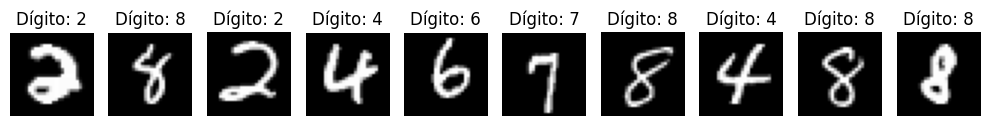

In [3]:
#@title plot exemplares

# Função para visualizar uma amostra de dígitos do MNIST
def plot_mnist_samples(X, y, n_samples=10):
    """
    Plota n_samples aleatórios do dataset MNIST.

    Parâmetros:
    X: Dados do MNIST (imagens achatadas)
    y: Rótulos do MNIST
    n_samples: Número de amostras a serem exibidas (padrão é 10)
    """
    plt.figure(figsize=(10, 1.5))  # Configurar o tamanho da figura
    for i in range(n_samples):
        # Escolher um índice aleatório
        idx = random.randint(0, X.shape[0] - 1)
        # Pegar a imagem correspondente e redimensionar para 28x28
        img = X.iloc[idx].values.reshape(28, 28)
        # Pegar o rótulo correspondente
        label = y.iloc[idx]
        # Plotar a imagem
        plt.subplot(1, n_samples, i + 1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')  # Remover eixos
        plt.title(f"Dígito: {label}")

    plt.tight_layout()
    plt.show()

n_exemplos = 10 #@param {type:"slider", min:1, max:100, step:1}
# Chamar a função para exibir 10 amostras aleatórias do MNIST
plot_mnist_samples(X_mnist, y_mnist, n_samples=n_exemplos)


##  Pré-processamento dos dados

Como de praxe,  vamos normalizar os dados antes de aplicar a redução da dimensionalidade.

**Atividade Extra**: faça os exercícios abaixo sem normalizar os dados e veja a diferença nos resultados.   

In [4]:
# Normalizar os dados para que os algoritmos de redução de dimensionalidade funcionem corretamente
scaler = StandardScaler()

# Escalar os dados do MNIST
X_mnist_scaled = scaler.fit_transform(X_mnist)

# Parte II - Reduzindo a dimensionalidade e visualizando os dados

**Valor**: 10 pontos

## 3. Implemente as funções que para execução dos algoritmos de clusterização abaixo.

**Agora é com você!!!**

Utilize a biblioteca `scikitlearn`  para implementar as questões abaixo.

> Revisite os Notebooks 06, 07 e 08, se necessário.

### A.  **PCA**

#### Implemente o PCA

Utilize o algoritmo PCA da `scikitlearn`.

Considere o parâmetro numero de componentes = 2.

Imprima o vetor de variância explicada.

In [16]:
#seu código  aqui

# Aplicar PCA para reduzir os dados do MNIST para 2 dimensões
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_mnist_scaled)
pca.explained_variance_ratio_

array([0.05642719, 0.04041226])

**Perguntas**:

1. Qual a variância da primeira componente principal?

    5%
1. Qual a variância da segunda componente principal?

    4%

**Respostas**:



#### **Plot um gráfico da variância explicada acumulada**

Calcule e  plot um gráfico para  visualizar a variância explicada acumulada, de acordo com o número de componentes principais.

> **Dica**: você pode utilizar a função `np.cumsum()` para calcular a soma acumulada da variância explicada para cada número de componentes, passando como argumento apenas o vetor de variância explicada do PCA.

> **Dica 2**: Aumente o número de componentes do PCA para visualizar a variância acumulada.

<Figure size 700x500 with 0 Axes>

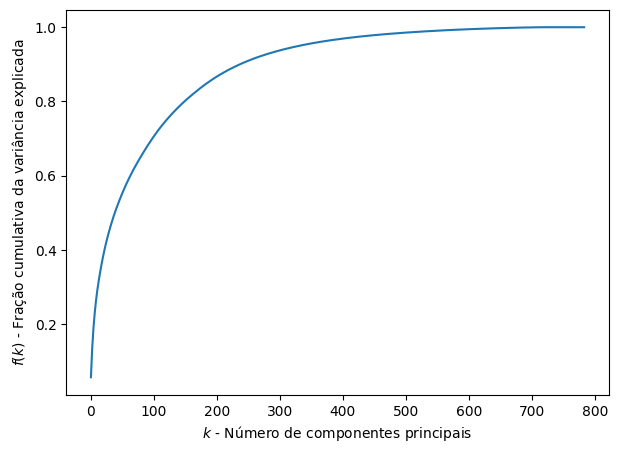

In [19]:
#seu código aqui

# Obter a variância explicada acumulada para cada número de componentes
#Verificando o quanto a decomposição explica os dados
from sklearn.decomposition import PCA
pca = PCA(n_components=784)
pca.fit(X_mnist_scaled)

import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(7, 5))
plt.figure(figsize=(7, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel(r'$k$ - Número de componentes principais')
plt.ylabel(r'$f(k)$ - Fração cumulativa da variância explicada')
plt.show()



**Pergunta**:

1. A partir de quantos componentes, aproximadamente a variância explicada é maior do que 80%?

    A partir de, aproximadamente, 190 componentes.

2. A partir de quantos componentes principais, aproximadamente, a uma estabilização e e os demais componentes não contribuem siginificativamente para a variância explicada?

    A partir de, aproximadamente, 300 componentes.




**Respostas**:



#### Visualize os dados das componentes principais

Implemente uma função para visualizar as duas componentes principais.
Adicione as cores de acordo com os rótulos em `y_mnist`.

> Dica: use a `seaborn.scatterplot` e use o parametro `hue=y_mnist` para definir as cores dos pontos.

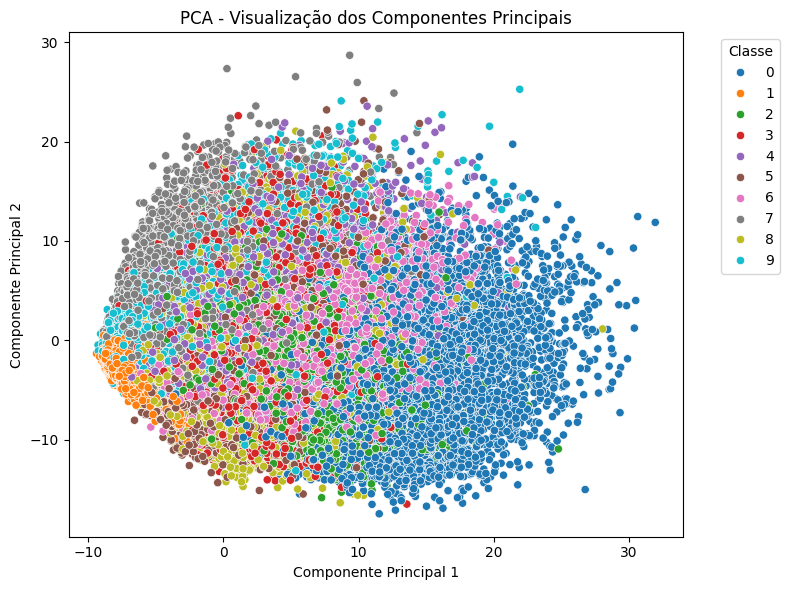

In [27]:
#seu código aqui
pca = PCA(n_components=2)
pca.fit(X_mnist_scaled)
X_pca = pca.transform(X_mnist_scaled) # OU X_pca = pca.fit_transform(X_mnist_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_mnist)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA - Visualização dos Componentes Principais')
plt.legend(title='Classe', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### B.  **t-SNE**

#### Aplicar o t-SNE

Aplique o t-SNE para reduzir os dados para 2 dimensões.

> dica: Ao tentar utilizar a base completa, você observará que a célula ficará em longo tempo de execução.  Como mencionado na aula, o t-SNE é caro computacionalmente e demanda muitos recursos para execução em bases de dados grandes.  Nes sentido, por questão de tempo computacional, pode ser necessário utilizar apenas uma amostra de pontos para conseguir executar o algoritmo. Neste caso, utilize  10.000 pontos  (`X_mnist_scaled[:10000]`).

In [ ]:
# Aplicar t-SNE para reduzir os dados para 2 dimensões


 #### Visualize os resultados do t-SNE

 Implemente uma função para visualizar as duas dimensões reduzidas pelo t-SNE. Adicione as cores de acordo com os rótulos em y_mnist.

Dica: use a seaborn.scatterplot e use o parametro hue=y_mnist para definir as cores dos pontos.

In [ ]:
# Seu código aqui


#  Parte 3: Discussão sobre os resultados

**Valor**: 5 pontos


Discuta sobre os resultados obtidos até aqui no campo abaixo.

 A discussão deve conter as razões pelas quais os resultados das visualizações foram diferentes.

> Escreva sua resposta aqui.